# 岭回归 Ridge Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
m = 100
x = np.random.uniform(-3,3,size=m)
y = x * 0.5 + 4. + np.random.normal(0.,1.,size=m)
X = x.reshape(-1,1)

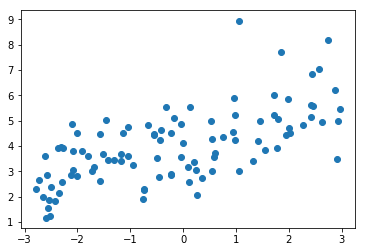

In [9]:
plt.scatter(x,y)
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
def poly_regression(degree):
    return Pipeline(
        [
            ('poly',PolynomialFeatures(degree=degree)),
            ('ss',StandardScaler()),
            ('lr',LinearRegression())
        ]
    )

In [35]:
def model_plot(alg,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    alg.fit(X_train,y_train)
    y_p = alg.predict(X_test)
    
    X_plot = np.linspace(-3,3,m).reshape(-1,1)
    y_plot = alg.predict(X_plot)
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,10])
    plt.show()
    print('\nmse : ' , mean_squared_error(y_p,y_test))

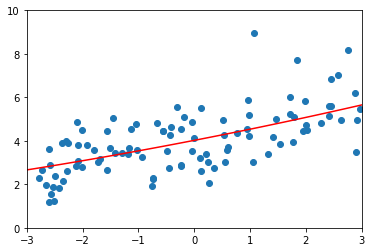


mse :  1.1436157925136354


In [36]:
model_plot(poly_regression(2),X,y)

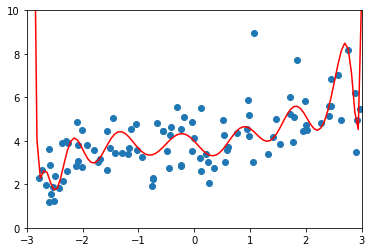


mse :  1.7978483163686374


In [37]:
model_plot(poly_regression(20),X,y)

## 使用岭回归

In [38]:
from sklearn.linear_model import Ridge

In [39]:
def ridge_regression(degree,alpha):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('ridege',Ridge(alpha=alpha))
    ])

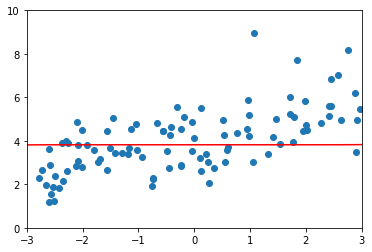


mse :  3.2759315620015093


In [55]:
model_plot(ridge_regression(20,1000000),X,y)